<a href="https://colab.research.google.com/github/AmanDesai-coder/stock-analysis/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import pandas as pd


# New Section

In [ ]:
stock_symbol = "APL"
stocks = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol="+stock_symbol+"&apikey=HID1RNPI5SK189KB&datatype=csv&datatype=csv")
stocks


,timestamp,open,high,low,close,volume
0,2015-02-27,26.85,27.1600,26.520,26.63,1599515
1,2015-02-26,27.41,27.5599,26.720,27.08,542364
2,2015-02-25,27.13,27.6400,27.070,27.45,552061
3,2015-02-24,27.31,27.6500,27.055,27.29,509065
4,2015-02-23,27.21,27.4400,26.640,27.35,3881194
...,...,...,...,...,...,...
3789,2000-02-03,11.75,11.7500,11.750,11.75,10000
3790,2000-02-02,12.00,12.3800,11.500,11.75,31100
3791,2000-02-01,12.25,12.3800,12.000,12.00,14300
3792,2000-01-31,12.38,12.5000,12.130,12.38,26300


In [ ]:
#data = stocks[['Open', 'Low', 'Close', 'Volume']].to_numpy()
fraction = 0.2
input_data = stocks[['open', 'low']].to_numpy()

training_x = input_data[int(len(input_data)*fraction):]
training_x_max = np.max(training_x, axis = 0)

testing_x = input_data[:int(len(input_data)*fraction)]

training_x = training_x/training_x_max
#testing_x = testing_x/training_x_max


result_data = stocks[['high']].to_numpy()

training_y = result_data[int(len(input_data)*fraction):]
training_y_max = np.max(training_y, axis = 0)

testing_y = result_data[:int(len(input_data)*fraction)]

training_y = training_y/training_y_max
#testing_y = testing_y/training_y_max
testing_x

array([[26.85, 26.52],
       [27.41, 26.72],
       [27.13, 27.07],
       ...,
       [37.67, 37.6 ],
       [37.38, 37.14],
       [36.45, 36.4 ]])

In [ ]:
def build_predictive_model(x_train, y_train):  
  layer_1 = tf.keras.layers.Dense(16, input_shape = [2], activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_2 = tf.keras.layers.Dropout(0.3)
  layer_3 = tf.keras.layers.Dense(32)
  layer_4 = tf.keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_5 = tf.keras.layers.Dense(4, activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_6 = tf.keras.layers.Dense(1)
  model = tf.keras.Sequential([layer_1, layer_4, layer_5, layer_6])
  model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
  model.fit(x_train, y_train, epochs = 10, verbose= 1, batch_size=32)
  return model


In [ ]:



model = build_predictive_model(training_x, training_y)
model.evaluate(testing_x/training_x_max, testing_y/training_y_max)




model.predict([[477.05, 477]]/training_x_max)*training_y_max

Epoch 1/10
95/95 [==============================] - 0s 922us/step - loss: 0.2251 - mean_absolute_error: 0.2251
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 3/10
95/95 [==============================] - 0s 895us/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 4/10
95/95 [==============================] - 0s 985us/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 5/10
95/95 [==============================] - 0s 940us/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 6/10
95/95 [==============================] - 0s 893us/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 7/10
95/95 [==============================] - 0s 931us/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 8/10
95/95 [==============================] - 0s 977us/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 9/10
95/95 [==============================] - 0s 921us/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epo

array([[473.74937004]])

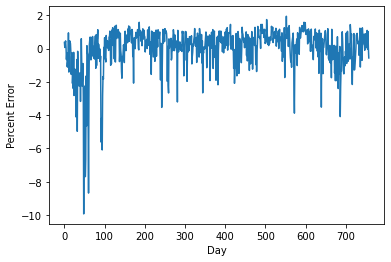

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Day')
ax.set_ylabel('Percent Error')

ax.plot((model.predict(testing_x/training_x_max)*training_y_max-testing_y)/testing_y*100)
plt.show()

In [ ]:

np.average((model.predict(testing_x/training_x_max)*training_y_max-testing_y)/testing_y)


0.0001768235874826743